In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

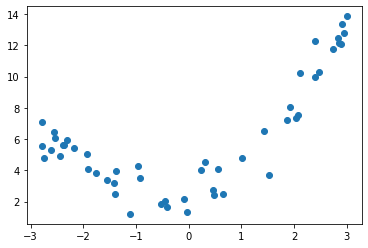

In [2]:
# generate data based on x^2+x+2
m = 50 # number of points
x = 6*np.random.rand(m,1)-3
y = x**2 + x + 2 + np.random.randn(m,1)
plt.scatter(x,y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# train-test split
X_train,X_test,y_train,y_test = train_test_split(x,y)

mean squared error on training set 0.19880858234723706
mean squared error on testing set 54.07212968370122


(-1.0, 15.0)

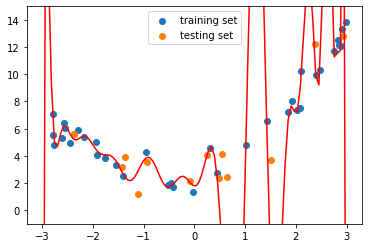

In [5]:
# regression pipeline
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=50,include_bias=False)),
    ('regressor',LinearRegression())
])

# plot training and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# fit the pipeline to the training set
pipe.fit(X_train,y_train)

# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red',label='fitted polynomial')

# compute the mean squared errors
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print('mean squared error on training set '+str(mse_train))
print('mean squared error on testing set '+str(mse_test))
plt.ylim([-1,15])

degree 1 model is underfitting

degree 50 model is overfitting

In [6]:
# large coeffs -> overfitting
pipe['regressor'].coef_

array([[-3.66169230e+02,  2.39055870e+04, -2.99366642e+05,
        -1.38432348e+07,  5.79905644e+08, -1.02606011e+10,
         1.08986902e+11, -7.67683526e+11,  3.72948311e+12,
        -1.25964888e+13,  2.89061179e+13, -4.15313000e+13,
         2.72773957e+13,  1.27762930e+13, -2.82263293e+13,
        -6.33947857e+12,  2.32749536e+13,  1.16807812e+13,
        -1.47225426e+13, -1.85435489e+13, -5.35663008e+11,
         1.69409881e+13,  1.48055156e+13, -8.22262622e+11,
        -1.52339222e+13, -1.57236515e+13,  2.28747762e+11,
         9.60233800e+12,  1.34379109e+13,  8.71866207e+12,
        -3.80011736e+12, -1.22522759e+13, -1.07893896e+13,
        -4.27878012e+12,  4.86508576e+12,  1.06698921e+13,
         1.01889610e+13,  1.78712473e+12, -5.15464385e+12,
        -1.09132359e+13, -7.47182074e+12,  9.78466095e+11,
         6.99724671e+12,  8.64689850e+12,  3.03714470e+12,
        -6.25904245e+12, -6.74170871e+12, -1.88407436e+12,
         9.43465898e+12, -3.49599757e+12]])

## Ridge regression

In [7]:
from sklearn.linear_model import Ridge

mean squared error on training set 0.8044026261349554
mean squared error on testing set 1.581153183547785


(-1.0, 15.0)

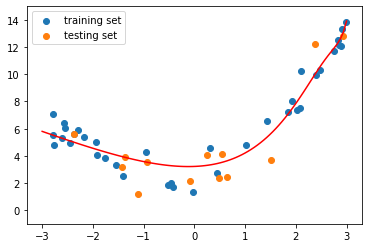

In [8]:
# regression pipeline
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=50,include_bias=False)),
    ('regressor',Ridge(alpha=0.1))
])

# plot training and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# fit the pipeline to the training set
pipe.fit(X_train,y_train)

# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red',label='fitted polynomial')

# compute the mean squared errors
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print('mean squared error on training set '+str(mse_train))
print('mean squared error on testing set '+str(mse_test))
plt.ylim([-1,15])

In [9]:
# small coefficients
pipe['regressor'].coef_

array([[-7.43311227e+00,  1.83111486e+00,  4.38454015e+00,
         4.30395076e+00,  3.46499701e+00,  2.53391078e+00,
         1.72013839e+00,  1.06883063e+00,  5.69710555e-01,
         1.97361364e-01, -7.44604943e-02, -2.68383563e-01,
        -4.02621077e-01, -4.91392693e-01, -5.45650782e-01,
        -5.73786920e-01, -5.82223864e-01, -5.75882477e-01,
        -5.58540111e-01, -5.33102392e-01, -5.01808491e-01,
        -4.66386185e-01, -4.28169294e-01, -3.88186946e-01,
        -3.47231750e-01, -3.05912102e-01, -2.64692510e-01,
        -2.23924832e-01, -1.83872589e-01, -1.44729952e-01,
        -1.06636652e-01, -6.96897042e-02, -3.39526736e-02,
         5.36993120e-04,  3.37621508e-02,  6.57213340e-02,
         9.64250827e-02,  1.25893018e-01,  1.54151519e-01,
         1.81231876e-01,  2.07168825e-01,  2.31999397e-01,
         2.55762003e-01,  2.78495724e-01,  3.00239759e-01,
         3.21033000e-01,  3.40913709e-01,  3.59919277e-01,
         3.78086052e-01,  3.95449215e-01]])

## Lasso regression

In [10]:
from sklearn.linear_model import Lasso

mean squared error on training set 0.6636210015183152
mean squared error on testing set 1.5557908338625988


(-1.0, 15.0)

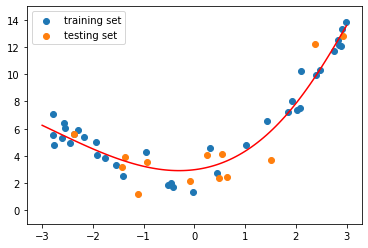

In [11]:
# regression pipeline
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=50,include_bias=False)),
    ('regressor',Lasso(alpha=0.0075))
])

# plot training and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()

# fit the pipeline to the training set
pipe.fit(X_train,y_train)

# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot fitted model
m_plot = 100
x_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red',label='fitted polynomial')

# compute the mean squared errors
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print('mean squared error on training set '+str(mse_train))
print('mean squared error on testing set '+str(mse_test))
plt.ylim([-1,15])

In [12]:
# most coefficients are zero
pipe['regressor'].coef_

array([-10.29536241,   0.        ,  18.58776521,   0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.36318416,  -0.25229203,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

## Two plots

In [30]:
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=50,include_bias=False)),
    ('regressor',Ridge(alpha=0)) # linear regression
])

In [27]:
# accessing the degree
pipe['poly_features'].degree = 1

In [28]:
mse_train = []
mse_test = []
for degree in range(1,75):
    pipe['poly_features'].degree = degree
    pipe.fit(X_train,y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))

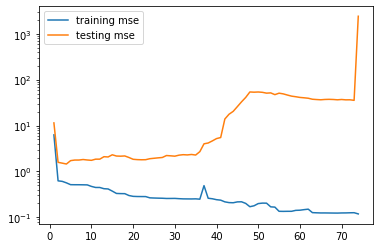

In [29]:
# use a logarithmic scale for the y axis
plt.semilogy(range(1,75),mse_train,label='training mse')
plt.semilogy(range(1,75),mse_test,label='testing mse')
plt.legend()

In [31]:
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=50, include_bias=False)),
                ('regressor', Ridge(alpha=0))])

In [35]:
pipe['poly_features'].degree = 50
alpha_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]
mse_train = []
mse_test = []
for alpha in alpha_list:
    pipe['regressor'].alpha = alpha
    pipe.fit(X_train,y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))

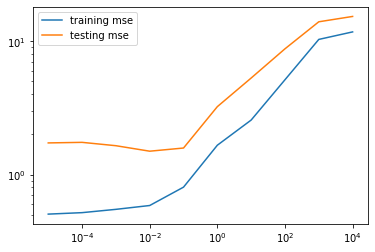

In [36]:
plt.loglog(alpha_list,mse_train,label='training mse')
plt.loglog(alpha_list,mse_test,label='testing mse')
plt.legend()

In [ ]:
# grid search